## Read in Data

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import plotly.express as px

In [2]:
# Read in experiment results into dataframe
experiment_results_dataframe = pd.read_csv('/content/experiment_results_dataframe.csv')
# View dataframe
experiment_results_dataframe

,index,Image_ID_w_ImagenetLabel,clutter,First_Fix_to_Target,IoU_Fixmap_GT,IoU_Gradcam_GT,GTCS,SCS,Target_Size,Target_Eccentricity,...,Ave_Target_Salience(IttiKoch),Model_Confidence,Fixmap_area_of_image,Gradcam_area_of_image,Ratio_Fixmap_precision_Gradcam_precision,Log_Precision_Ratio,Ratio_Fixmap_hitrate_Gradcam_hitrate,Log_Hitrate_Ratio,Ratio_Fixmap_IoU_Gradcam_IoU,Log_IoU_Ratio
0,1,408taxicab,106,3.947368,0.474326,0.581560,0.099633,0.029817,0.112690,148.101078,...,0.364990,99.999928,0.056229,0.129724,1.400715,0.336983,0.614544,-0.486875,0.818726,-0.200006
1,3,759window screen,73,5.000000,0.327688,0.548296,0.635412,0.728006,0.128462,168.688421,...,0.088784,99.077410,0.091407,0.194025,1.008492,0.008456,0.481014,-0.731859,0.604855,-0.502767
2,4,421tray,110,3.111111,0.197528,0.264791,0.766208,0.864705,0.182503,111.623093,...,0.198511,99.357480,0.036049,0.100058,1.679935,0.518755,0.621089,-0.476281,0.755221,-0.280745
3,6,708bookcase,108,4.789474,0.110936,0.636689,0.020646,0.041795,0.374748,122.374499,...,0.262229,100.000000,0.041573,0.238598,1.000000,0.000000,0.187008,-1.676606,0.187008,-1.676606
4,9,621bookcase,155,4.466667,0.331719,0.508482,0.232181,0.290250,0.053541,150.321428,...,0.397954,99.067444,0.035330,0.105295,1.227765,0.205196,0.419267,-0.869248,0.659076,-0.416916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,103,678paper towel,104,5.666667,0.148757,0.001248,0.135818,0.356597,0.004743,130.367007,...,0.162199,99.428469,0.031885,0.146874,14.065753,2.643743,20.262506,3.008772,14.114148,2.647178
169,112,485table lamp,122,5.000000,0.141947,0.014553,0.046292,0.204061,0.004347,108.201660,...,0.428272,99.907851,0.030623,0.298692,6.188508,1.822694,1.000000,0.000000,6.188508,1.822694
170,65,508moped,103,5.750000,0.077529,0.012960,0.125016,0.085847,0.004262,140.399154,...,0.157714,98.527110,0.054967,0.328834,3.812304,1.338234,1.000000,0.000000,3.812304,1.338234
171,204,778toilet paper,138,6.285714,0.089247,0.000000,0.647116,0.597707,0.003987,194.584388,...,0.094141,99.959570,0.044676,0.280555,9.924672,2.295024,101.000000,4.615121,9.924672,2.295024


## Scatterplot Alignment metric with Feature

### Function

In [34]:
def plot_scatterplot_matplotlib(dataset, x_axis_variable, y_axis_variable, color='blue'):
  # Sort the data by log_iou_ratio for a better visualization
  sorteddataset = dataset.sort_values(by=x_axis_variable)

  # Plot the original data
  plt.scatter(sorteddataset[x_axis_variable], sorteddataset[y_axis_variable], label='Original Data', color=color)

  # Add labels and title
  plt.xlabel(x_axis_variable)
  plt.ylabel(y_axis_variable)
  plt.title('Scatterplot of data')
  plt.legend()

  # Show the plot
  plt.show()

In [39]:
def plot_scatterplot(dataset, x_axis, feature):
    # Sort the data by x_axis for a better visualization
    sorted_dataset = dataset.sort_values(by=x_axis)

    # Create a scatter plot with hover information
    fig = px.scatter(sorted_dataset, x=x_axis, y=feature, title='Data Distribution of ' + str(x_axis) + ' vs ' + str(feature),
                     labels={x_axis: x_axis, feature: feature}, hover_data=['Image_ID_w_ImagenetLabel'])

    # Show the plot
    fig.show()

### Visualizations

Call the function with the columns of choice to visualize from experiment_results_dataframe


Examples for visualizing First_Fix_to_Target against GT Alignment using Iou (Log_IoU_Ratio are), Precision (Log_Precision_Ratio) and Hitrate (Log_Hitrate_Ratio) are shown

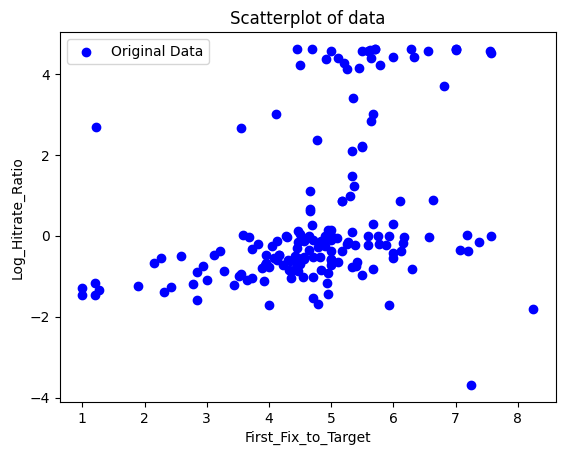

In [15]:
plot_scatterplot_matplotlib(experiment_results_dataframe, 'First_Fix_to_Target','Log_Hitrate_Ratio')

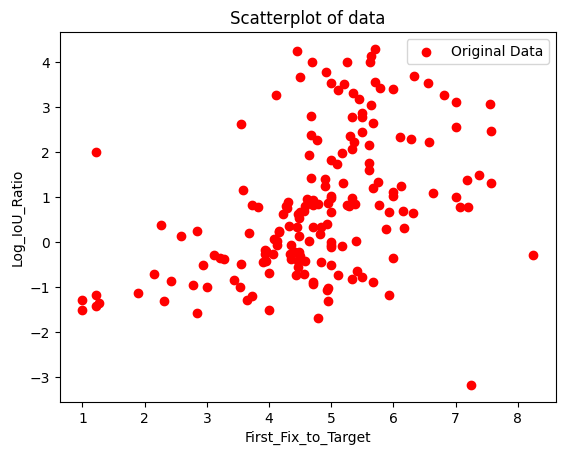

In [16]:
# customize color using color=''. Default is blue
plot_scatterplot_matplotlib(experiment_results_dataframe, 'First_Fix_to_Target','Log_IoU_Ratio', color='red')

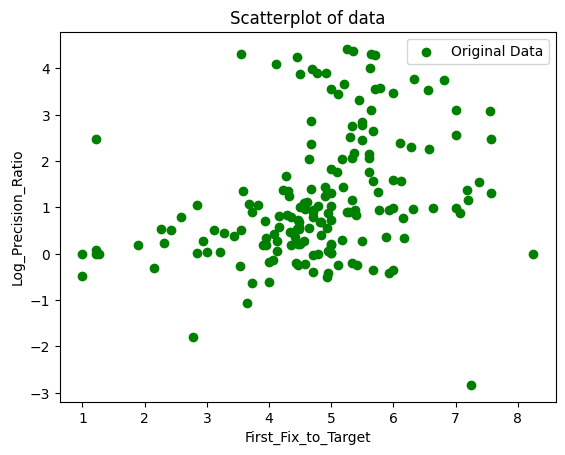

In [18]:
plot_scatterplot_matplotlib(experiment_results_dataframe, 'First_Fix_to_Target','Log_Precision_Ratio',  color='green')

Interactive scatterplot allowing each point to be identified by hovering over points

In [40]:
plot_scatterplot(experiment_results_dataframe, 'First_Fix_to_Target','IoU_Gradcam_Fixmap')

## Scatterplots with Linear/Polynomial Trendlines

### Function definitions

In [47]:
def plot_linear_trendline(dataset, x_axis, feature, color='blue'):
    # Sort the data by x_axis for a better visualization
    sorted_dataset = dataset.sort_values(by=x_axis)

    # Calculate the linear fit
    slope, intercept = np.polyfit(sorted_dataset[x_axis], sorted_dataset[feature], 1)

    # Plot the original data
    plt.scatter(sorted_dataset[x_axis], sorted_dataset[feature], label='Original Data', color=color)

    # Plot the linear trendline
    plt.plot(sorted_dataset[x_axis], slope * sorted_dataset[x_axis] + intercept, label='Linear Fit', linestyle='--', color='red')

    # Add labels and title
    plt.xlabel(x_axis)
    plt.ylabel(feature)
    plt.title('Linear Trendline of ' + str(x_axis) + ' vs ' + str(feature) + 'slope='+str(round(slope,2)))
    plt.legend()

    # Show the plot
    plt.show()

    return slope

In [48]:
def plot_polynomial_trendline(dataset, x_axis, feature, degree=2):
    # Sort the data by x_axis for a better visualization
    sorted_dataset = dataset.sort_values(by=x_axis)

    # Calculate the polynomial fit
    coeffs = np.polyfit(sorted_dataset[x_axis], sorted_dataset[feature], degree)

    # Create a polynomial function using the coefficients
    poly_function = np.poly1d(coeffs)

    # Generate y values using the polynomial function
    y_values = poly_function(sorted_dataset[x_axis])

    # Plot the original data
    plt.scatter(sorted_dataset[x_axis], sorted_dataset[feature], label='Original Data')

    # Plot the polynomial trendline
    plt.plot(sorted_dataset[x_axis], y_values, label=f'Degree {degree} Polynomial Fit', linestyle='--', color='red')

    # Add labels and title
    plt.xlabel(x_axis)
    plt.ylabel(feature)
    plt.title(f'Polynomial Trendline of {x_axis} vs {feature} (Degree {degree})')
    plt.legend()

    # Show the plot
    plt.show()

    return coeffs

In [49]:
import statsmodels.api as sm

def linear_regression_test(dataset, x_axis, feature):
    # Add a constant term for the intercept
    X = sm.add_constant(dataset[x_axis])
    y = dataset[feature]

    # Fit the linear regression model
    model = sm.OLS(y, X).fit()

    # Print the regression summary
    print(model.summary())

    # Extract the slope and p-value
    slope = model.params[x_axis]
    p_value = model.pvalues[x_axis]

    # Plot the original data
    plt.scatter(dataset[x_axis], dataset[feature], label='Original Data')

    # Plot the linear trendline
    plt.plot(dataset[x_axis], slope * dataset[x_axis] + model.params['const'], label='Linear Fit', linestyle='--', color='red')

    # Add labels and title
    plt.xlabel(x_axis)
    plt.ylabel(feature)
    plt.title(f'Linear Trendline of {x_axis} vs {feature} (Slope = {round(slope, 2)}, p-value = {round(p_value, 6)})')
    plt.legend()

    # Show the plot
    plt.show()

    return slope, p_value


### Visualizations

Plot linear trendline

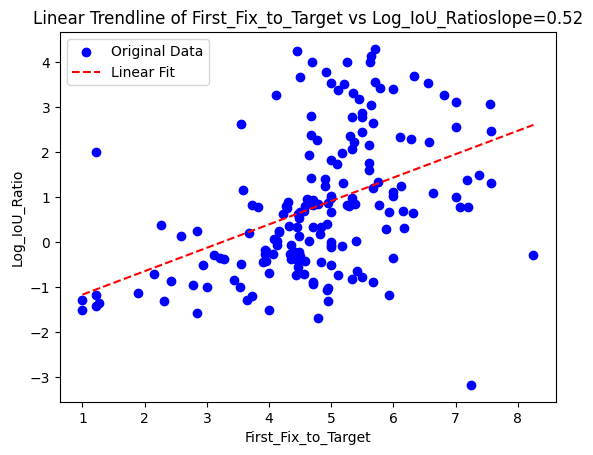

Slope of linear trendline:  0.5195415445437963


In [25]:
slope = plot_linear_trendline(experiment_results_dataframe, 'First_Fix_to_Target', 'Log_IoU_Ratio')
print("Slope of linear trendline: ", slope)

Plot a polynomial trendline

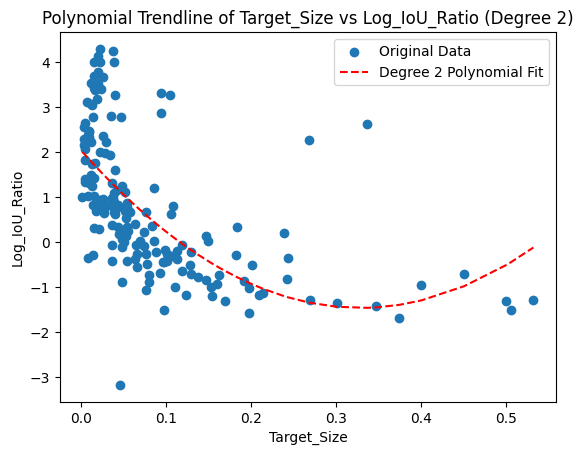

Coeffs of polynomial trendline:  [ 32.29948256 -21.25613797   2.03431226]


In [27]:
coeffs = plot_polynomial_trendline(experiment_results_dataframe, 'Target_Size', 'Log_IoU_Ratio')
print("Coeffs of polynomial trendline: ", coeffs)

Test significance of linear slope against 0 with an OLS regression test

                            OLS Regression Results                            
Dep. Variable:          Log_IoU_Ratio   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     42.28
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           8.38e-10
Time:                        14:56:26   Log-Likelihood:                -302.02
No. Observations:                 173   AIC:                             608.0
Df Residuals:                     171   BIC:                             614.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.6866    

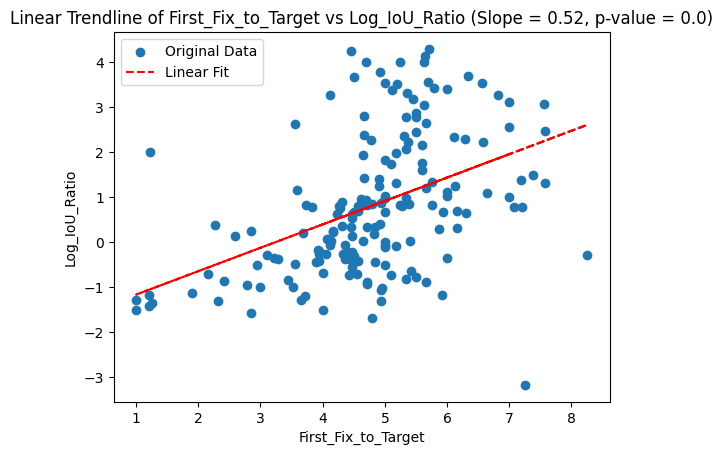

(0.5195415445437968, 8.380730160704867e-10)

In [50]:
linear_regression_test(experiment_results_dataframe, 'First_Fix_to_Target', 'Log_IoU_Ratio')

## Histogram Heatmapped Plots

### Function definition

In [53]:
import matplotlib.ticker as mticker

def plotheatmappedhistogram(df, colnameforhistogram, colnameforheatmap, num_bins=20):
    # Create a new column 'bin' based on the log_ratio_precision values
    df['bin'] = pd.cut(df[colnameforhistogram], bins=num_bins)

    # Calculate the average IoU per bin
    average_per_bin = df.groupby('bin')[colnameforheatmap].mean()

    # Assuming RdBu is the colormap
    cmap = plt.cm.RdBu_r

    # Create a normalization instance for the colormap
    norm = Normalize(vmin=min(average_per_bin), vmax=max(average_per_bin))

    # We first plot the bars as blank white, then overlap the heatmap colors into the bins
    plt.figure(figsize=(10, 6))
    # !!! NOTE for the below line, white means bars are white so without overlay looks blank
    hist, edges, _ = plt.hist(df[colnameforhistogram], bins=num_bins, color='white', alpha=0.7)

    # Overlay each bar with a colored rectangle based on the average IoU
    for i, (count, edge) in enumerate(zip(hist, edges[:-1])):
        color = cmap(norm(average_per_bin.iloc[i]))
        plt.fill_betweenx(y=[0, count], x1=edge, x2=edges[i + 1], color=color, alpha=0.7)

    # Set the axis labels and title
    plt.xlabel(colnameforhistogram)
    plt.ylabel('Count')

    # Calculate the total count of data points
    total_count = len(df[colnameforhistogram])

    ax = plt.gca()
    ax.set_ylim([0, 65])

    plt.title('Histogram of ' + colnameforhistogram + ' colored by Average ' + colnameforheatmap + ' per bin')

    # Add color bar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # You need to set an array for the color mapping
    cbar = plt.colorbar(sm)
    cbar.set_label('Histogram of ' + colnameforhistogram + ' colored by Average ' + colnameforheatmap + ' per bin')

    # Show the plot
    plt.show()

In [62]:

def plotheatmappedhistogram_withzoom(df, y_axis_range, colnameforhistogram, colnameforheatmap, num_bins=20, zoom_range=None):
    # Filter data based on the zoom range
    if zoom_range:
        df = df[(df[colnameforhistogram] >= zoom_range[0]) & (df[colnameforhistogram] <= zoom_range[1])]

    # Create a new column 'bin' based on the log_ratio_precision values
    df['bin'] = pd.cut(df[colnameforhistogram], bins=num_bins)

    # Calculate the average IoU per bin
    average_iou_per_bin = df.groupby('bin')[colnameforheatmap].mean()

    # Assuming RdBu is the colormap
    cmap = plt.cm.RdYlBu_r

    # Create a normalization instance for the colormap
    norm = Normalize(vmin=min(average_iou_per_bin), vmax=max(average_iou_per_bin))

    plt.figure(figsize=(10, 6))
    hist, edges, _ = plt.hist(df[colnameforhistogram], bins=num_bins, color='white', alpha=0.7)
    # !!! NOTE for the above line, white means bars are white so without overlay looks blank

    dictofbinimages = {}
    # Overlay each bar with a colored rectangle based on the average IoU
    for i, (count, edge) in enumerate(zip(hist, edges[:-1])):
        color = cmap(norm(average_iou_per_bin.iloc[i]))
        plt.fill_betweenx(y=[0, count], x1=edge, x2=edges[i + 1], color=color, alpha=0.7)

        # Display images corresponding to data points in each bar
        bin_images = df[df['bin'] == average_iou_per_bin.index[i]]['Image_ID_w_ImagenetLabel'].tolist()
        print('bin number', i, bin_images)
        dictofbinimages[i] = bin_images

    # Set the axis labels and title
    plt.xlabel(colnameforhistogram)
    plt.ylabel('Count')

    # Calculate the total count of data points
    total_count = len(df[colnameforhistogram])

    # Set y-axis ticks to represent percentages with more ticks
    ax = plt.gca()
    ax.set_ylim(y_axis_range)

    plt.title('Histogram of ' + colnameforhistogram)

    # Add color bar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # You need to set an array for the color mapping
    cbar = plt.colorbar(sm)
    cbar.set_label('Histogram of ' + colnameforhistogram + ' colored by Average ' + colnameforheatmap + ' per bin')

    # Show the plot
    plt.show()
    return dictofbinimages

In [68]:
import cv2
from google.colab.patches import cv2_imshow

def showimages_inbin(path_to_imageplots_file, df, dictofbinimages, binnumber, showimgstats=True):
  print('Images in bin ', binnumber)
  for imagename in dictofbinimages[binnumber]:
    print(imagename)
    if showimgstats==True:
      print(df.loc[df['Image_ID_w_ImagenetLabel'] == imagename])
    # Uncomment to use custom path
    imgfilepath = path_to_imageplots_file+'/precaccfixmap0.45grad0.65_'+imagename+'.png'
    # Or upload onto google colab's files and access from there
    # imgfilepath = '/content/Corrected_cleanplots/precaccfixmap0.45grad0.65_'+imagename+'.png'
    theimg = cv2.imread(imgfilepath)
    cv2_imshow(theimg)

### Visualize

<ipython-input-53-1ef5719d8879>:41: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



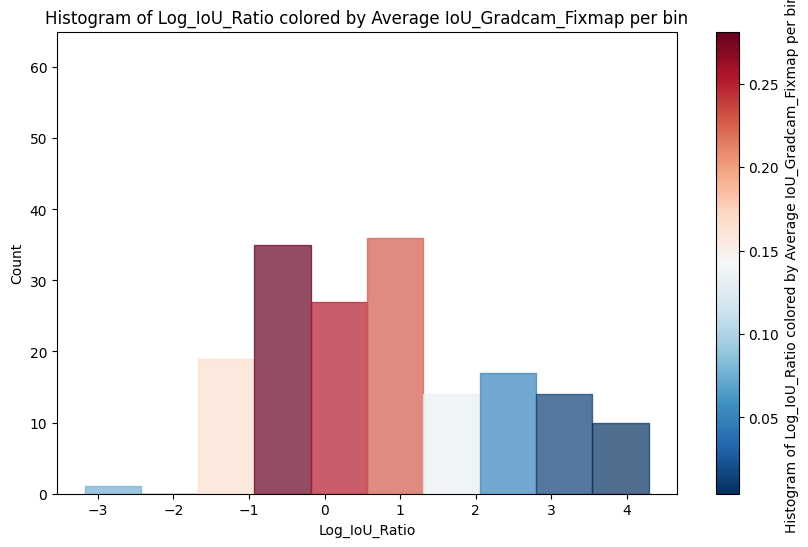

In [55]:
plotheatmappedhistogram(experiment_results_dataframe, 'Log_IoU_Ratio','IoU_Gradcam_Fixmap', num_bins=10)

Zoom in on a specific range of the x axis and visualize images from within each bin

bin number 0 ['436mountain bike']
bin number 1 []
bin number 2 ['708bookcase', '562waste container', '720digital clock', '598cup', '722soup bowl', '740rocking chair', '521beer glass', '730desk', '529bath towel', '579sewing machine', '673orange', '581sink', '578coffee mug', '446bookcase', '712rocking chair', '535wardrobe', '530coffee mug', '462washing machine', '418wardrobe']
bin number 3 ['408taxicab', '759window screen', '421tray', '621bookcase', '569tray', '582mountain bike', '637microwave oven', '431toaster', '420fur coat', '628notebook computer', '528bookcase', '449mountain bike', '776plastic bag', '671mailbox', '430vase', '539waste container', '713cup', '764sink', '746laptop computer', '774table lamp', '465television', '771window screen', '556passenger car', '589rocking chair', '466television', '633television', '546couch', '651notebook computer', '419soup bowl', '601rocking chair', '635rocking chair', '523waste container', '752pillow', '459front curtain', '583doormat']
bin number 

<ipython-input-62-5b38f697ff36>:49: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



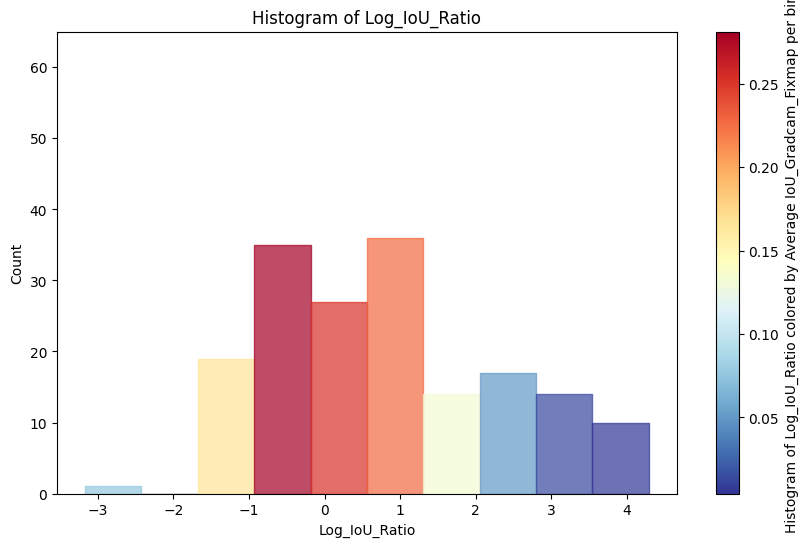

In [63]:
# Extract images in each bin
# Zoom range defines the range of the x axis to zoom into, if zoom range is not specified, the entire histogram is plotted
dictof_ims_perbin = plotheatmappedhistogram_withzoom(experiment_results_dataframe, [0, 65], 'Log_IoU_Ratio','IoU_Gradcam_Fixmap', num_bins=10, zoom_range=[])

Example of same plot zoomed into range [-1,1] on the x axis, using 3 bins, with the y axis range set to [0,40] to zoom in on relevant results

<ipython-input-62-5b38f697ff36>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-62-5b38f697ff36>:49: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



bin number 0 ['759window screen', '621bookcase', '582mountain bike', '637microwave oven', '431toaster', '420fur coat', '628notebook computer', '528bookcase', '449mountain bike', '776plastic bag', '671mailbox', '539waste container', '713cup', '764sink', '465television', '556passenger car', '589rocking chair', '466television', '529bath towel', '546couch', '578coffee mug', '651notebook computer', '419soup bowl', '601rocking chair', '635rocking chair', '523waste container', '530coffee mug', '459front curtain', '583doormat']
bin number 1 ['408taxicab', '421tray', '569tray', '463window screen', '761water bottle', '479sink', '608pole', '655table lamp', '430vase', '744television', '746laptop computer', '774table lamp', '771window screen', '799window screen', '524window screen', '501goldfish', '753car wheel', '633television', '741refrigerator', '698wine bottle', '607ambulance', '623rocking chair', '457monitor', '734front curtain', '752pillow', '679couch', '779sink', '448seashore', '424spotlight

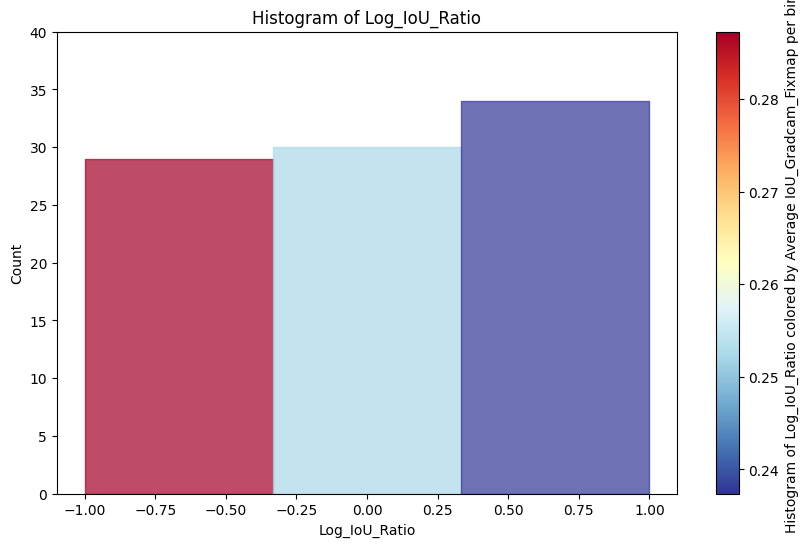

In [67]:
dictof_ims_perbin = plotheatmappedhistogram_withzoom(experiment_results_dataframe, [0, 40], 'Log_IoU_Ratio','IoU_Gradcam_Fixmap', num_bins=3, zoom_range=[-1,1])

<ipython-input-84-f2c9f220deaa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin'] = pd.cut(df[colnameforhistogram], bins=num_bins)


bin number 0 ['529bath towel', '578coffee mug', '530coffee mug']
bin number 1 ['589rocking chair', '651notebook computer', '601rocking chair']
bin number 2 ['528bookcase', '431toaster', '539waste container']
bin number 3 ['523waste container']
bin number 4 ['546couch', '583doormat', '671mailbox', '776plastic bag', '459front curtain']
bin number 5 ['628notebook computer']
bin number 6 ['465television']
bin number 7 ['556passenger car', '759window screen', '419soup bowl']
bin number 8 ['713cup', '466television', '449mountain bike', '621bookcase', '635rocking chair']
bin number 9 ['637microwave oven', '420fur coat', '582mountain bike', '764sink']
bin number 10 ['421tray', '752pillow', '774table lamp']
bin number 11 ['746laptop computer', '408taxicab', '771window screen', '430vase', '569tray', '633television']
bin number 12 ['501goldfish']
bin number 13 ['607ambulance', '457monitor', '744television']
bin number 14 ['799window screen', '655table lamp']
bin number 15 ['679couch', '741refrige

<ipython-input-84-f2c9f220deaa>:49: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


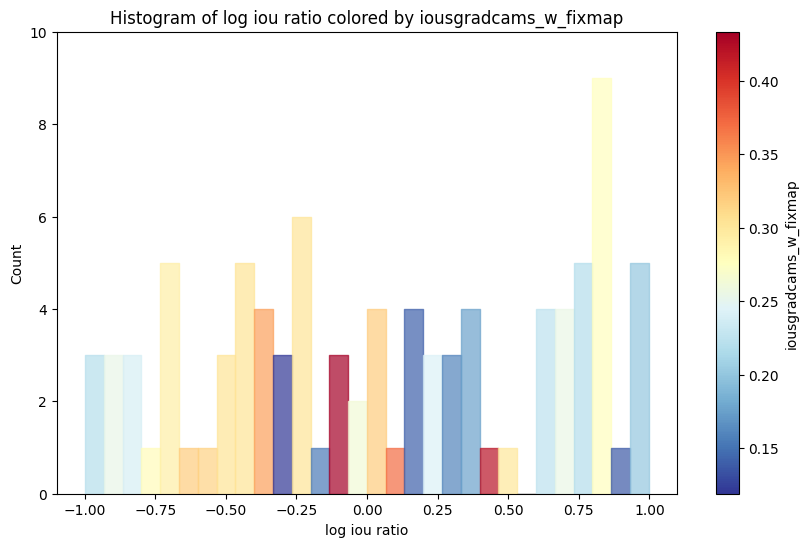

In [ ]:
path_to_images = '/content/Corrected_cleanplots'
dictof_ims_perbin = plotheatmappedhistogram_withzoom(experiment_results_dataframe, [0, 10], 'Log_IoU_Ratio','IoU_Gradcam_Fixmap', num_bins=30, zoom_range=[-1,1])

Function below shows images inside any bin in the above histogram (0 is the first bin, 1 is the second bin and so on)

Images in bin  0
529bath towel


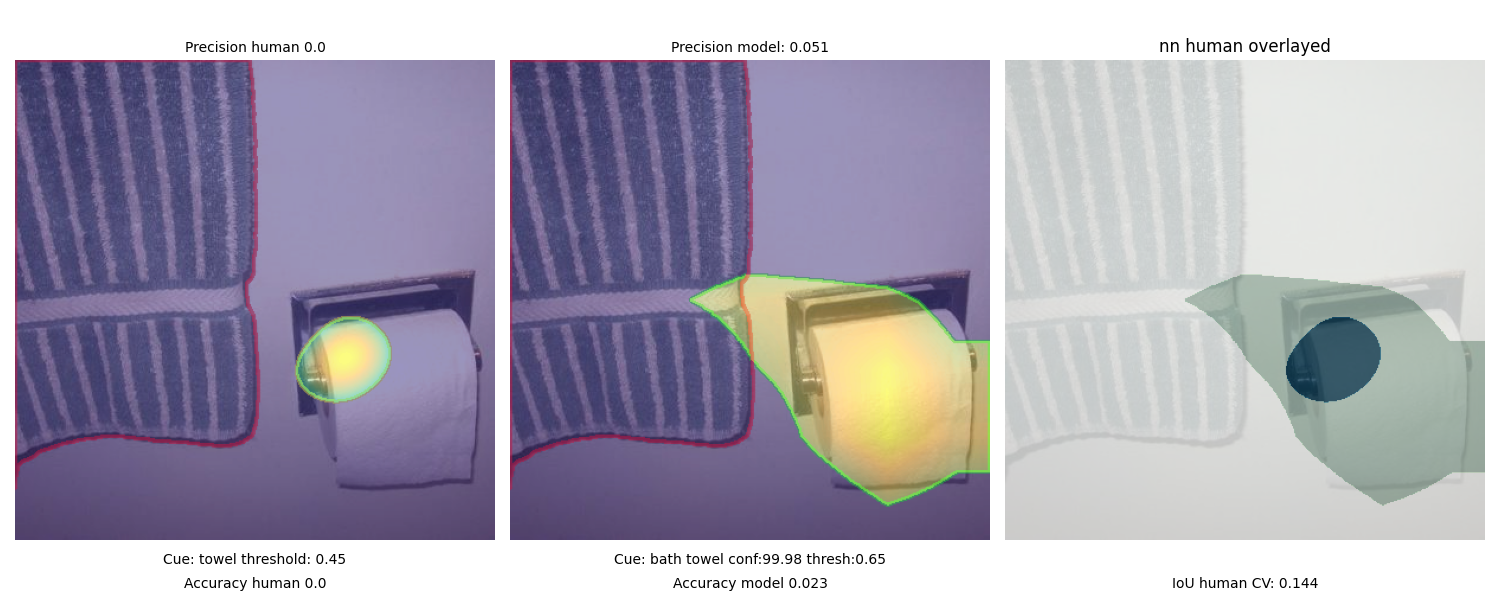

578coffee mug


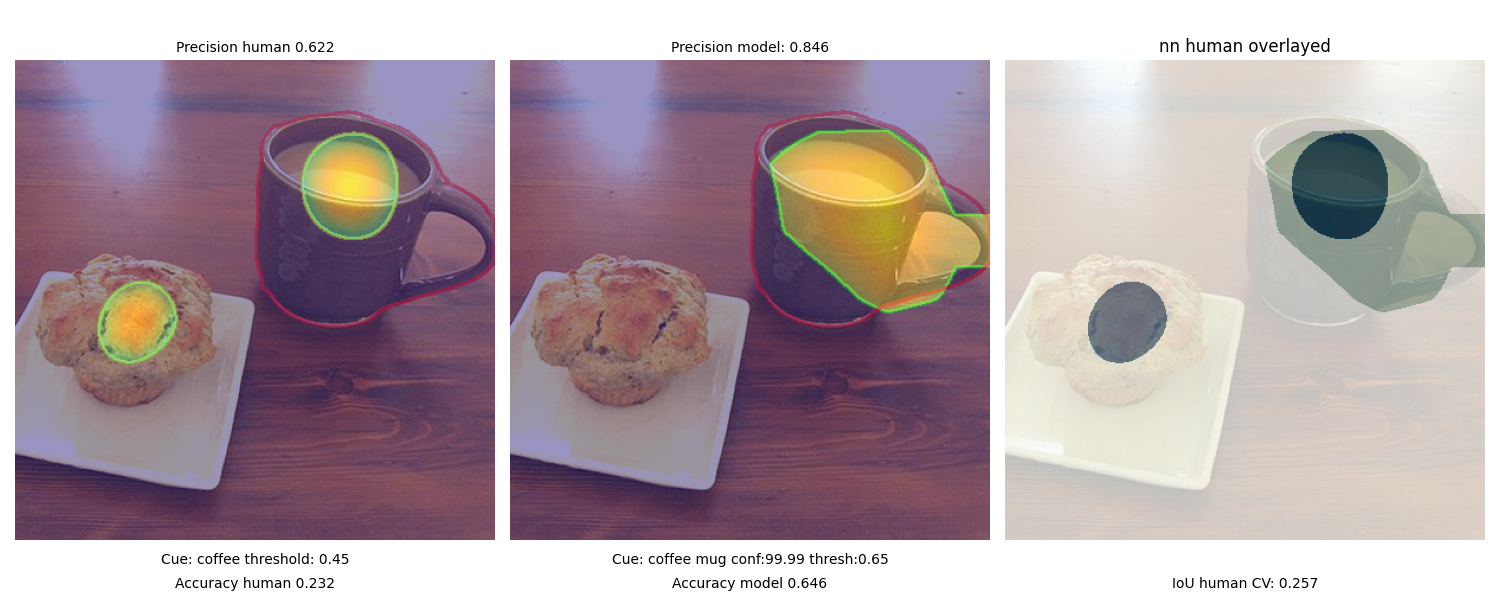

530coffee mug


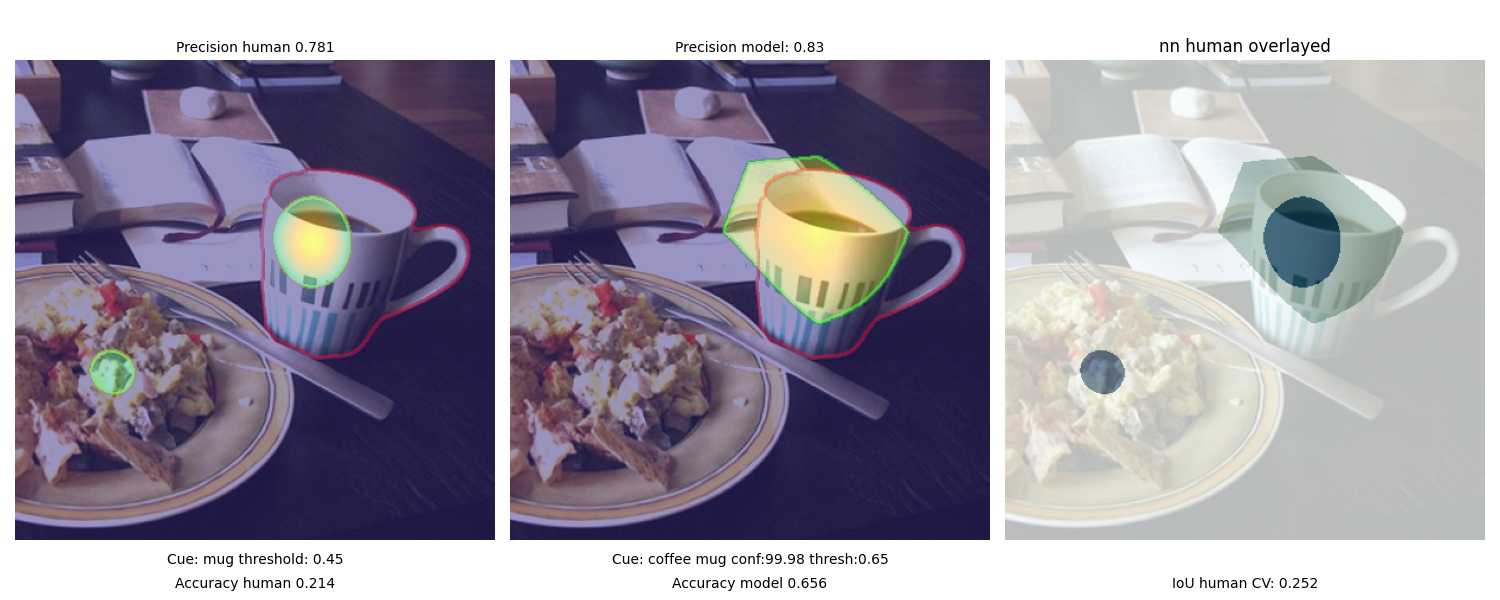

In [ ]:
showimages_inbin(doublecheckdf2, dictof_ims_perbin, binnumber=0, showimgstats=False)